In [1]:
import cv2 as cv
import os
import sys
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive
from google.colab.patches import cv_imshow
drive.mount('/content/drive')

Mounted at /content/drive


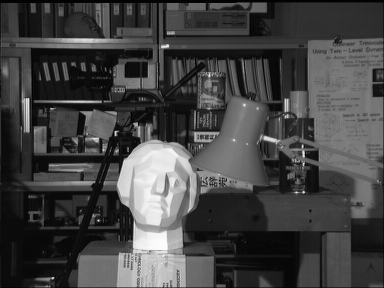

In [5]:
folder = r'/content/drive/MyDrive/images'
path_img = os.path.join(folder,'tsukuba_l.png')

img = cv.imread(path_img)
if img is None:
  sys.exit("could not read the image.")
cv_imshow(img)
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

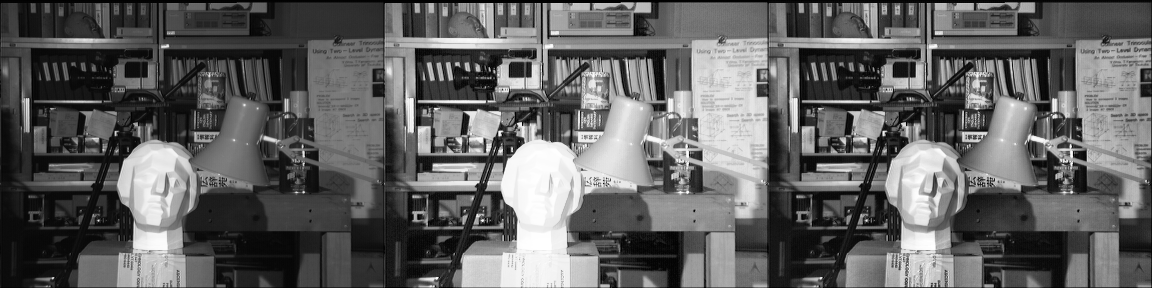

In [6]:
# HE
equ = cv.equalizeHist(img_gray)

clahe = cv.createCLAHE(clipLimit = 2.0,tileGridSize=(8,8))
cla = clahe.apply(img_gray)

res = np.hstack((img_gray,equ,cla))
cv_imshow(res)

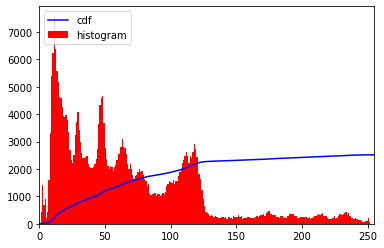

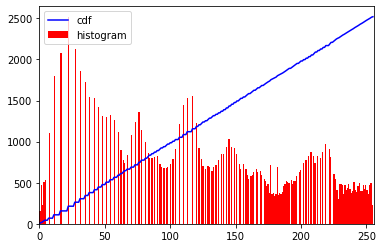

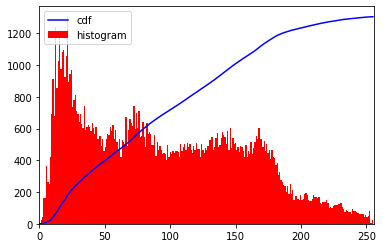

In [10]:
# cumulative distribution function (cdf)
hist,bins = np.histogram(img_gray.flatten(),256,[0,255])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized,color = 'b')
plt.hist(img.flatten(),256,[0,255],color = 'r')
plt.xlim([0,255])
plt.legend(('cdf','histogram'),loc = 'upper left')
plt.show()

hist,bins = np.histogram(equ.flatten(),256,[0,255])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(),256,[0,255],color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'),loc = 'upper left')
plt.show()

hist,bins = np.histogram(cla.flatten(),256,[0,255])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(cla.flatten(),256,[0,255],color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'),loc = 'upper left')
plt.show()
